 ## AUTHOR : Lokesh Bansode

<b> Task 1: Prediction using Supervised Machine Learning
    
<b> GRIP @ The Sparks Foundation

#gripjanuary23

In this regression task I tried to predict the percentage of marks that a student expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involvesjust two variables.


####  Importing Required Librebries: Sklearn, Numpy array, Pandas, Matplotlib, Seaborn

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn  import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

#### Step 1 - Import Dataset 

In [85]:
df = pd.read_csv("D:\BIA\student_scores.csv")

In [86]:
#Lets check the head of the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [87]:
#checking the shape of the data
df.shape

(25, 2)

In [88]:
#lets check do we have any null value in data
df.isnull().sum().any()

False

As we can See the output is False So we can conclude that there is no null value in our dataset and we can proceed the furthur analysis

#### Step 2 - Input Data Visualization

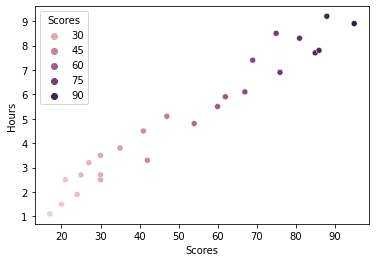

In [89]:
#lets check the relationship between hours and scores
sns.scatterplot(x = "Scores", y= "Hours", data = df, hue = "Scores")
plt.show()

As we can see there is a positive relation between our input variable and target variable

#### Step 3 - Data processing

In [90]:
df_Input = df.drop(['Scores'],axis=1).values
df_Target = df.Scores.values

#### Step 4 -  Model Training

In [91]:
#We Going to split the data
x_train, x_test, y_train, y_test = train_test_split(df_Input,df_Target, test_size =.20,random_state= 0)

Training Complete

In [92]:
#Creating The Linear Regression object

lr = linear_model.LinearRegression()

In [93]:
lr.fit(x_train, y_train)
print("Training Complete.")

Training Complete.


In [94]:
lr.coef_

array([9.91065648])

In [95]:
lr.intercept_

2.018160041434662

#### Step 5 -  Plotting the Line of regression

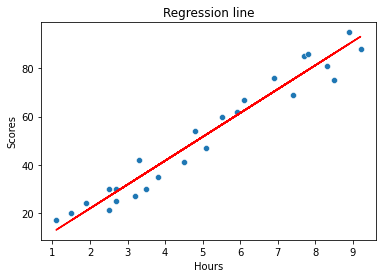

In [96]:
line = lr.coef_*df_Input+lr.intercept_
sns.scatterplot(x = 'Hours', y = 'Scores', data = df)
plt.title('Regression line')
plt.plot(df_Input, line, c = 'r');
plt.show()

Now that we have trained our algorithm, it's time to test the model by making some predictions.
For this we will use our test-set data

In [97]:
y_predict = lr.predict(x_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### What Will be predicted score if a student studies for 9.25hrs/day ?

In [98]:
X_new = pd.DataFrame({'Hours':[9.25]})
predicted_score = lr.predict(X_new)
print(f'Predicted Score : {predicted_score}')

Predicted Score : [93.69173249]


Comparing Actual result to the Predicted Model result

In [101]:
Difference= pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
Difference

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Evaluating the Model

checking the error rate of our model which help us to understand how accurate our model is

In [103]:
print('Mean Absolute Error:',
     metrics.mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 4.183859899002982
